Consumatori solo sostanze legali: 467
Consumatori anche sostanze illegali: 1418


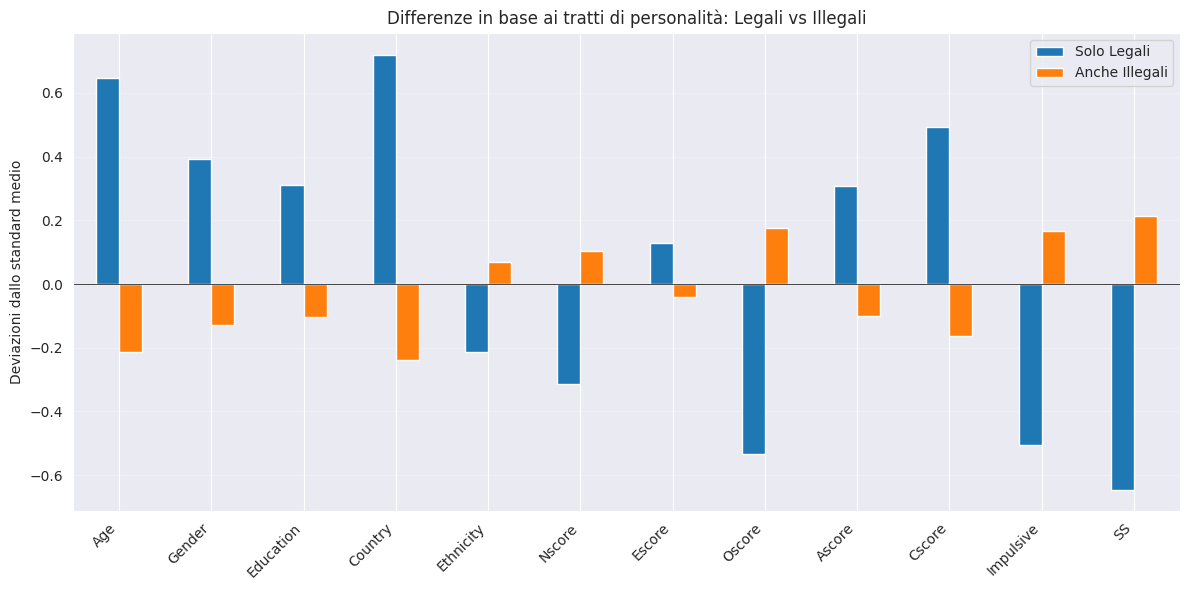

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drug_consumption.data", header=None)

columns = [
    "ID", "Age", "Gender", "Education", "Country", "Ethnicity",
    "Nscore", "Escore", "Oscore", "Ascore", "Cscore",
    "Impulsive", "SS",
    "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis",
    "Choc", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine",
    "Legalh", "LSD", "Meth", "Mushroom", "Nicotine",
    "Semer", "VSA"
]

df.columns = columns
df = df.drop(columns=["ID"])

X = df.iloc[:, :12]
targets = df.iloc[:, 12:]

X = X.apply(pd.to_numeric, errors='coerce')

targets_binary = targets.astype(str).replace({
    'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1
})

legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = [col for col in targets_binary.columns
                 if col not in legal_drugs and col != 'Semer']

mask_legal_only = (
    (targets_binary[legal_drugs].sum(axis=1) >= 0) &
    (targets_binary[illegal_drugs].sum(axis=1) == 0)
)
mask_illegal = (targets_binary[illegal_drugs].sum(axis=1) > 0)

print(f"Consumatori solo sostanze legali: {mask_legal_only.sum()}")
print(f"Consumatori anche sostanze illegali: {mask_illegal.sum()}")

features_legal = X[mask_legal_only].mean()
features_illegal = X[mask_illegal].mean()

comparison_df = pd.DataFrame({
    'Solo Legali': features_legal,
    'Anche Illegali': features_illegal
})

X_mean = X.mean()
X_std = X.std().replace(0, 1)

comparison_df_norm = comparison_df.sub(X_mean, axis=0).div(X_std, axis=0)

comparison_df_norm.plot(kind='bar', figsize=(12, 6))
plt.title("Differenze in base ai tratti di personalità: Legali vs Illegali")
plt.ylabel("Deviazioni dallo standard medio")
plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()